### $\color{blue}{\text{Dados Espaciais SciPy}}$

#### $\color{red}{\text{Trabalhando com dados espaciais}}$

Dados espaciais referem-se a dados que são representados em um espaço geométrico.

Por exemplo, pontos em um sistema de coordenadas.

E os dados espaciais são usadas para várias coisas como descobrir se um ponto está dentro de um limite ou não.

O SciPy fornece o módulo **scipy.spatial**, que possui funções para trabalhar com dados espaciais.

#### $\color{red}{\text{Triangulação}}$
A Triangulação de um polígono é dividir o polígono em vários triângulos com os quais podemos calcular uma área do polígono.

Uma triangulação com pontos significa criar triângulos compostos de superfície em que todos os pontos dados estão em pelo menos um vértice de qualquer triângulo na superfície.

Um método para gerar essas triangulações através de pontos é a Triangulação **Delaunay()**.


Exemplo: (Criar uma triangulação a partir dos seguintes pontos)

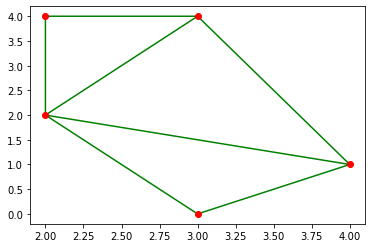

In [2]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1]
])

simplices = Delaunay(points).simplices

plt.triplot(points[:, 0], points[:, 1], simplices, color ='g')
plt.scatter(points[:, 0], points[:, 1], color='r')

plt.show()

> A propriedade **simplices** cria uma generalização da notação triangular.

#### $\color{red}{\text{Convex Hull}}$

Um Convex Hull é o menor polígono que cobre todos os pontos dados.

Use o método **ConvexHull()** para criar um Convex Hull.

Exemplo: (Criar um Convex Hull para os pontos a seguir)

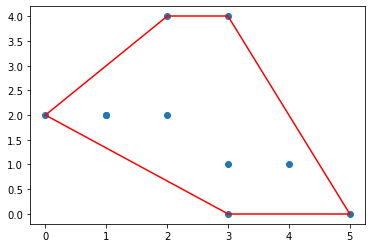

In [5]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1],
  [1, 2],
  [5, 0],
  [3, 1],
  [1, 2],
  [0, 2]
])

hull = ConvexHull(points)
hull_points = hull.simplices

plt.scatter(points[:,0], points[:,1])
for simplex in hull_points:
  plt.plot(points[simplex,0], points[simplex,1], 'r')

plt.show()

#### $\color{red}{\text{KDTtreesGenericName}}$

KDTrees são uma estrutura de dados otimizada para consultas de vizinhos mais próximos.

Por exemplo, em um conjunto de pontos usando KDTrees, podemos perguntar com eficiência quais pontos estão mais próximos de um determinado ponto.

O método **KDTree()** retorna um objeto KDTree.

O método **query()** retorna a distância até o vizinho mais próximo e a localização dos vizinhos.

Exemplo: (Encontrar o vizinho mais próximo do ponto (1,1))

In [6]:
from scipy.spatial import KDTree

points = [(1, -1), (2, 3), (-2, 3), (2, -3)]

kdtree = KDTree(points)

res = kdtree.query((1, 1))

print(res)

(2.0, 0)


#### $\color{red}{\text{Matriz de distância}}$
Existem muitas métricas de distância usadas para encontrar vários tipos de distâncias entre dois pontos em ciência de dados, distância euclidiana, distância cosseno etc.

A distância entre dois vetores pode não ser apenas o comprimento da linha reta entre eles, mas também o ângulo entre eles desde a origem, ou o número de passos unitários necessários, etc.

Muitos dos desempenhos do algoritmo de aprendizado de máquina dependem muito das métricas de distância. Por exemplo, "K vizinhos mais próximos", ou "K significa" etc.

Existem algumas das distâncias métricas tal qual:

##### $\color{orange}{\text{Distância euclidiana}}$

Exemplo: (Encontrar a distância euclidiana entre os pontos dados)


In [8]:
from scipy.spatial.distance import euclidean

p1 = (1, 0)
p2 = (10, 2)

resul = euclidean(p1, p2)

print(resul)

9.219544457292887


##### $\color{orange}{\text{Distância do quarteirão (distância de Manhattan)}}$
É a distância calculada usando 4 graus de movimento.

Por exemplo, só podemos nos mover: para cima, para baixo, para a direita ou para a esquerda, não na diagonal.

Exemplo:(Encontrar a distância do quarteirão entre os pontos dados)

In [9]:
from scipy.spatial.distance import cityblock

p1 = (1, 0)
p2 = (10, 2)

result = cityblock(p1, p2)

print(result)

11


##### $\color{orange}{\text{Distância do cosseno}}$

É o valor do ângulo cosseno entre os dois pontos A e B.

Exemplo: (Encontrar a distância cosseno entre os pontos dados)

In [10]:
from scipy.spatial.distance import cosine

p1 = (1, 0)
p2 = (10, 2)

result = cosine(p1, p2)

print(result)

0.019419324309079777


##### $\color{orange}{\text{Distância de Hamming}}$

É a proporção de bits onde dois bits são diferença.

É uma maneira de medir a distância para sequências binárias.

Exemplo: (Encontrar a distância de Hamming entre os pontos dados)

In [11]:
from scipy.spatial.distance import hamming

p1 = (True, False, True)
p2 = (False, True, True)

result = hamming(p1, p2)

print(result)

0.6666666666666666


### $\color{blue}{\text{Matrizes SciPy}}$

#### $\color{red}{\text{Trabalhando com Matrizes do Matlab}}$

Sabe-se que o NumPy nos fornece métodos para persistir os dados em formatos legíveis para Python. Mas o SciPy também nos fornece interoperabilidade com o Matlab.

O SciPy nos fornece o módulo **scipy.io**, que possui funções para trabalhar com arrays do Matlab.

#### $\color{red}{\text{Exportando dados no formato Matlab}}$

A função **savemat()** permite exportar dados em formato Matlab.

O método recebe os seguintes parâmetros:

- 1. filename: - o nome do arquivo para salvar dados.
- 2. mdict: um dicionário contendo os dados.
- 3. do_compression: um valor booleano que especifica se o resultado deve ser compactado ou não. Padrão Falso.

Exemplo: (Exporte a seguinte matriz como nome de variável "vec" para um arquivo mat)

In [12]:
from scipy import io
import numpy as np

arr = np.arange(10)

io.savemat('arr.mat', {"vec": arr})

> O exemplo acima salva um nome de arquivo "arr.mat" em seu computador;

>Para abrir o arquivo, veremos a seguir;

#### $\color{red}{\text{Importar dados do formato Matlab}}$
A função **loadmat()** nos permite importar dados de um arquivo Matlab.

A função recebe um parâmetro obrigatório:

- nome do arquivo: o nome do arquivo dos dados salvos.

Ele retornará um array estruturado cujas chaves são os nomes das variáveis e os valores correspondentes são os valores das variáveis.

Exemplo: (Importar a matriz do seguinte arquivo mat.)

In [13]:
from scipy import io
import numpy as np

arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9,])

# Export:
io.savemat('arr.mat', {"vec": arr})

# Import:
mydata = io.loadmat('arr.mat')

print(mydata)

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Sat Aug 27 17:44:55 2022', '__version__': '1.0', '__globals__': [], 'vec': array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])}


Usamos o nome da variável **vec** para exibir apenas o array dos dados do matlab.

In [14]:
print(mydata['vec'])

[[0 1 2 3 4 5 6 7 8 9]]


Podemos ver que a matriz originalmente era 1D, mas na extração ela aumentou uma dimensão.

Para resolver isso, podemos passar um argumento adicional **squeeze_me=True**

In [16]:
from scipy import io
import numpy as np

arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9,])

# Export:
io.savemat('arr.mat', {"vec": arr})

# Import:
mydata = io.loadmat('arr.mat', squeeze_me=True)

print(mydata['vec'])

[0 1 2 3 4 5 6 7 8 9]


### $\color{blue}{\text{Interpolação SciPy}}$

#### $\color{red}{\text{O que é Interpolação?}}$
A interpolação é um método para gerar pontos entre pontos dados.

Por exemplo: para os pontos 1 e 2, podemos interpolar e encontrar os pontos 1,33 e 1,66.

A interpolação tem muitos usos, em Machine Learning geralmente lidamos com dados ausentes em um conjunto de dados, a interpolação é frequentemente usada para substituir esses valores.

Esse método de preenchimento de valores é chamado de imputação .

Além da imputação, a interpolação é frequentemente usada quando precisamos suavizar os pontos discretos em um conjunto de dados.

#### $\color{red}{\text{Implementação}}$
SciPy nos fornece um módulo chamado **scipy.interpolate** que tem muitas funções para lidar com interpolação.

#### $\color{red}{\text{Interpolação 1D}}$

A função **interp1d()** é usada para interpolar uma distribuição com 1 variável.

Ele pega `x` e `y` aponta e retorna uma função que pode ser chamada com new `x` e retorna correspondente `y`.

Exemplo:(Para determinados valores de interpolação de xs e ys de 2,1, 2,2... a 2,9)

In [18]:
from scipy.interpolate import interp1d
import numpy as np

xs = np.arange(10)
ys = 2*xs + 1

interp_func = interp1d(xs, ys)

newarr = interp_func(np.arange(2.1, 3, 0.1))

print(newarr)

[5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8]


> Os novos `xs` devem estar no mesmo intervalo dos antigos xs, o que significa que não podemos chamar `interp_func()` com valores superiores a 10 ou inferiores a 0.

#### $\color{red}{\text{Interpolação de spline}}$
Na interpolação 1D os pontos são ajustados para uma única curva , enquanto na interpolação Spline os pontos são ajustados contra uma função por partes definida com polinômios chamados splines.

A função **UnivariateSpline()** recebe `xs` e `ys` e produz uma função chamável que pode ser chamada com new `xs`.

> Uma função que tem definição diferente para intervalos diferentes.

Exemplo: (Encontrar a interpolação de spline univariada para 2,1, 2,2... 2,9 para os seguintes pontos não lineares)

In [20]:
from scipy.interpolate import UnivariateSpline
import numpy as np

xs = np.arange(10)
ys = xs**2 + np.sin(xs) + 1

interp_func = UnivariateSpline(xs, ys)

newarr = interp_func(np.arange(2.1, 3, 0.1))

print(newarr)

[5.62826474 6.03987348 6.47131994 6.92265019 7.3939103  7.88514634
 8.39640439 8.92773053 9.47917082]


#### $\color{red}{\text{Interpolação com Função de Base Radial}}$

A função de base radial é uma função que é definida correspondendo a um ponto de referência fixo.

A função **Rbf()** também recebe `xs` e `ys` como argumentos e produz uma função que pode ser chamada com new `xs`.

Exemplo: (Interpole os seguintes xs e ys usando rbf e encontre valores para 2.1, 2.2 ... 2.9)

In [21]:
from scipy.interpolate import Rbf
import numpy as np

xs = np.arange(10)
ys = xs**2 + np.sin(xs) + 1

interp_func = Rbf(xs, ys)

newarr = interp_func(np.arange(2.1, 3, 0.1))

print(newarr)

[6.25748981 6.62190817 7.00310702 7.40121814 7.8161443  8.24773402
 8.69590519 9.16070828 9.64233874]


### $\color{blue}{\text{Testes de significância estatística}}$

Em estatística, significância estatística significa que o resultado que foi produzido tem uma razão por trás dele, não foi produzido aleatoriamente ou por acaso.

O SciPy nos fornece um módulo chamado **scipy.stats**, que possui funções para realizar testes de significância estatística.

##### $\color{orange}{\text{Hipótese em Estatística}}$
Hipótese é uma suposição sobre um parâmetro na população.

##### $\color{orange}{\text{Hipótese Nula}}$
Assume-se que a observação não é estatisticamente significativa.

##### $\color{orange}{\text{Hipótese Alternativa}}$

Assume-se que as observações se devem a alguma razão.

Sua alternativa à Hipótese Nula.

**Exemplo:**

Para uma avaliação de um aluno, tomaríamos:

"aluno é pior que a média" = como hipótese nula, e:

"aluno é melhor que a média" = como uma hipótese alternativa.

##### $\color{orange}{\text{Teste de unicaudal}}$
Quando nossa hipótese está testando apenas um lado do valor, ela é chamada de "teste unilateral".

**Exemplo:**

Para a hipótese nula:

"a média é igual a k", podemos ter hipóteses alternativas:

> "a média é menor que k", ou:

> "a média é maior que k"

##### $\color{orange}{\text{Teste de bicaudal}}$

Quando nossa hipótese está testando para ambos os lados dos valores.

**Exemplo:**

Para a hipótese nula:

"a média é igual a k", podemos ter hipóteses alternativas:

> "a média não é igual a k"

Nesse caso, a média é menor ou maior que k, e ambos os lados devem ser verificados.

##### $\color{orange}{\text{Valor alfa}}$

O valor alfa é o nível de significância.

**Exemplo:**

Quão próximos dos extremos os dados devem estar para que a hipótese nula seja rejeitada.

Geralmente é tomado como 0,01, 0,05 ou 0,1.

##### $\color{orange}{\text{Valor P}}$

O valor P informa o quão próximo do extremo os dados realmente estão.

O valor P e os valores alfa são comparados para estabelecer a significância estatística.

Se p valor <= alfa rejeitamos a hipótese nula e dizemos que os dados são estatisticamente significativos. caso contrário, aceitamos a hipótese nula.

#### $\color{red}{\text{Teste T}}$
Os testes t são usados para determinar se há deferência significativa entre as médias de duas variáveis. e nos permite saber se eles pertencem à mesma distribuição.

É um teste bicaudal.

A função **ttest_ind()** pega duas amostras do mesmo tamanho e produz uma tupla de estatística t e valor p.

Exemplo: (Descubrir se os valores fornecidos v1 e v2 são da mesma distribuição)

In [22]:
import numpy as np
from scipy.stats import ttest_ind

v1 = np.random.normal(size=100)
v2 = np.random.normal(size=100)

res = ttest_ind(v1, v2)

print(res)

Ttest_indResult(statistic=0.7582738583512743, pvalue=0.44918866081183517)


Se você quiser retornar apenas o valor-p, usamos a propriedade **pvalue**

In [23]:
res = ttest_ind(v1, v2).pvalue

print(res)

0.44918866081183517


#### $\color{red}{\text{Teste KS}}$

O **kstest** é usado para verificar se determinados valores seguem uma distribuição.

A função recebe o valor a ser testado e o CDF como dois parâmetros.

>Um CDF pode ser uma string ou uma função chamável que retorna a probabilidade.

Ele pode ser usado como um teste de uma cauda ou duas caudas.

Por padrão, é de duas caudas. Podemos passar o parâmetro alternativo como uma string de um dos dois lados, menor ou maior.

Exemplo: (Descubrir se o valor dado segue a distribuição normal)

In [30]:
import numpy as np
from scipy.stats import kstest

v = np.random.normal(size=100)

res = kstest(v, 'norm')

print(res)

KstestResult(statistic=0.13109020974664476, pvalue=0.058595173270236556)


#### $\color{red}{\text{Descrição estatística dos dados}}$

Para ver um resumo dos valores em uma matriz, podemos usar a função **describe()**.

Ele retorna a seguinte descrição:

- número de observações (nobs)
- valores mínimo e máximo = minmax
- média/mean
- variação/variance
- distorção/skewness
- curtose/kurtosis

Exemplo: (Mostrar descrição estatística dos valores em uma matriz)

In [27]:
import numpy as np
from scipy.stats import describe

v = np.random.normal(size=100)
res = describe(v)

print(res)

DescribeResult(nobs=100, minmax=(-2.0285102860803645, 2.537056889992886), mean=0.04474307699141516, variance=1.006985658270765, skewness=0.14828165396959742, kurtosis=-0.5616980956792315)


#### $\color{red}{\text{Testes de normalidade (assimetria e curtose)}}$

Os testes de normalidade são baseados na assimetria e curtose.

A função **normaltest()** retorna o valor p para a hipótese nula:

>"x vem de uma distribuição normal" .

**Skew/Distorção**:
Uma medida de simetria nos dados.

Para distribuições normais é 0.

Se for negativo, significa que os dados estão distorcidos à esquerda.

Se for positivo, significa que os dados estão distorcidos para a direita.

**Kurtosis/Curtose**:

Uma medida de se os dados são pesados ou levemente atados a uma distribuição normal.

Curtose positiva significa cauda pesada.

Curtose negativa significa cauda leve.

Exemplo: (Encontrar assimetria e curtose de valores em uma matriz)

In [28]:
import numpy as np
from scipy.stats import skew, kurtosis

v = np.random.normal(size=100)

print(skew(v))
print(kurtosis(v))

0.03893488952448918
-0.5015313972373141


Exemplo: (Descobrir se os dados vêm de uma distribuição normal)

In [29]:
import numpy as np
from scipy.stats import normaltest

v = np.random.normal(size=100)

print(normaltest(v))

NormaltestResult(statistic=5.414939511446423, pvalue=0.06670537425800105)


<img src="https://c.tenor.com/s--cuzGPB3sAAAAM/cat-death.gif" width="300">

#### Para mais específicações: 
#### [Spatial algorithms and data structures (scipy.spatial) ](https://docs.scipy.org/doc/scipy/reference/spatial.html ) 

#### [scipy.spatial.Delaunay ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Delaunay.html ) 

#### [scipy.spatial.ConvexHull ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html ) 

#### [scipy.spatial.KDTree ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html ) 

#### [scipy.spatial.KDTree.query ]( https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.query.html) 

#### [scipy.spatial.distance.euclidean ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html ) 

#### [scipy.spatial.distance.cityblock ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cityblock.html ) 

#### [scipy.spatial.distance.cosine ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html ) 

#### [scipy.spatial.distance.hamming ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.hamming.html ) 

#### [Input and output (scipy.io) ](https://docs.scipy.org/doc/scipy/reference/io.html ) 

#### [scipy.io.savemat ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.savemat.html ) 

#### [scipy.io.loadmat ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html ) 

#### [Interpolation (scipy.interpolate) ](https://docs.scipy.org/doc/scipy/reference/interpolate.html ) 

#### [ scipy.interpolate.interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html ) 

#### [scipy.interpolate.UnivariateSpline ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html ) 

#### [scipy.interpolate.Rbf ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.Rbf.html) 

#### [Statistical functions (scipy.stats) ](https://docs.scipy.org/doc/scipy/reference/stats.html) 

#### [scipy.stats.ttest_ind ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html ) 

#### [scipy.stats.kstest ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html ) 

#### [scipy.stats.describe ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html ) 

#### [scipy.stats.normaltest ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html ) 

#### [scipy.stats.skew ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html) 

#### [scipy.stats.kurtosis ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html )  